## Navigate to project directory.

In [29]:
cd /content/drive/MyDrive/footfall

/content/drive/MyDrive/footfall


## Clone the YOLOv5 repository and install the required dependencies.

In [ ]:
# clone project repository and install dependencies

%cd yolov5
%pip install -r requirements.txt # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-168-gec2b853 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/78.2 GB disk)


## Use %cat for  displaying the contents of the dataset configuration file

In [30]:
%cat /content/drive/MyDrive/footfall/AI-Task-footfallcam-3/data.yaml

names:
- work-tag
nc: 1
roboflow:
  license: CC BY 4.0
  project: ai-task-footfallcam
  url: https://universe.roboflow.com/azri-izzul-4qda7/ai-task-footfallcam/dataset/3
  version: 3
  workspace: azri-izzul-4qda7
test: /content/drive/MyDrive/footfall/AI-Task-footfallcam-3/test/images
train: /content/drive/MyDrive/footfall/AI-Task-footfallcam-3/train/images
val: /content/drive/MyDrive/footfall/AI-Task-footfallcam-3/valid


## Navigate to Yolo V5 directory.

In [31]:
cd yolov5/segment

/content/drive/MyDrive/footfall/yolov5/segment


## Training the Model

This line of code initiates the training process of the YOLOv5 model with instance segmentation.


- `--img 640` specifies the size of the images for training to be 640x640 pixels.
- `--batch 128` sets the batch size, i.e., the number of training samples to work through before the model's internal parameters are updated, to 128.
- `--epochs 50` defines the number of complete passes through the training dataset.
- `--data /content/drive/MyDrive/footfall/AI-Task-footfallcam-3/data.yaml` is the path to the YAML configuration file that contains information about the training and validation datasets.
- `--weights yolov5s-seg.pt` is the pre-trained weights used for transfer learning. In this case, it's the 'yolov5s-seg.pt'.
- `--name exp3` provides the name for the current experiment for easier reference in the future.

This command will start the training process for the model and store the output model weights and metrics in an experiment folder named 'exp3'.

In [ ]:
!python train.py --img 640 --batch 128 --epochs 50 --data /content/drive/MyDrive/footfall/AI-Task-footfallcam-3/data.yaml --weights yolov5s-seg.pt --name exp3

segment/train: weights=yolov5s-seg.pt, cfg=, data=/content/drive/MyDrive/footfall/AI-Task-footfallcam-3/data.yaml, hyp=../data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=128, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=../runs/train-seg, name=exp3, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, mask_ratio=4, no_overlap=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-168-gec2b853 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv

## Display the result

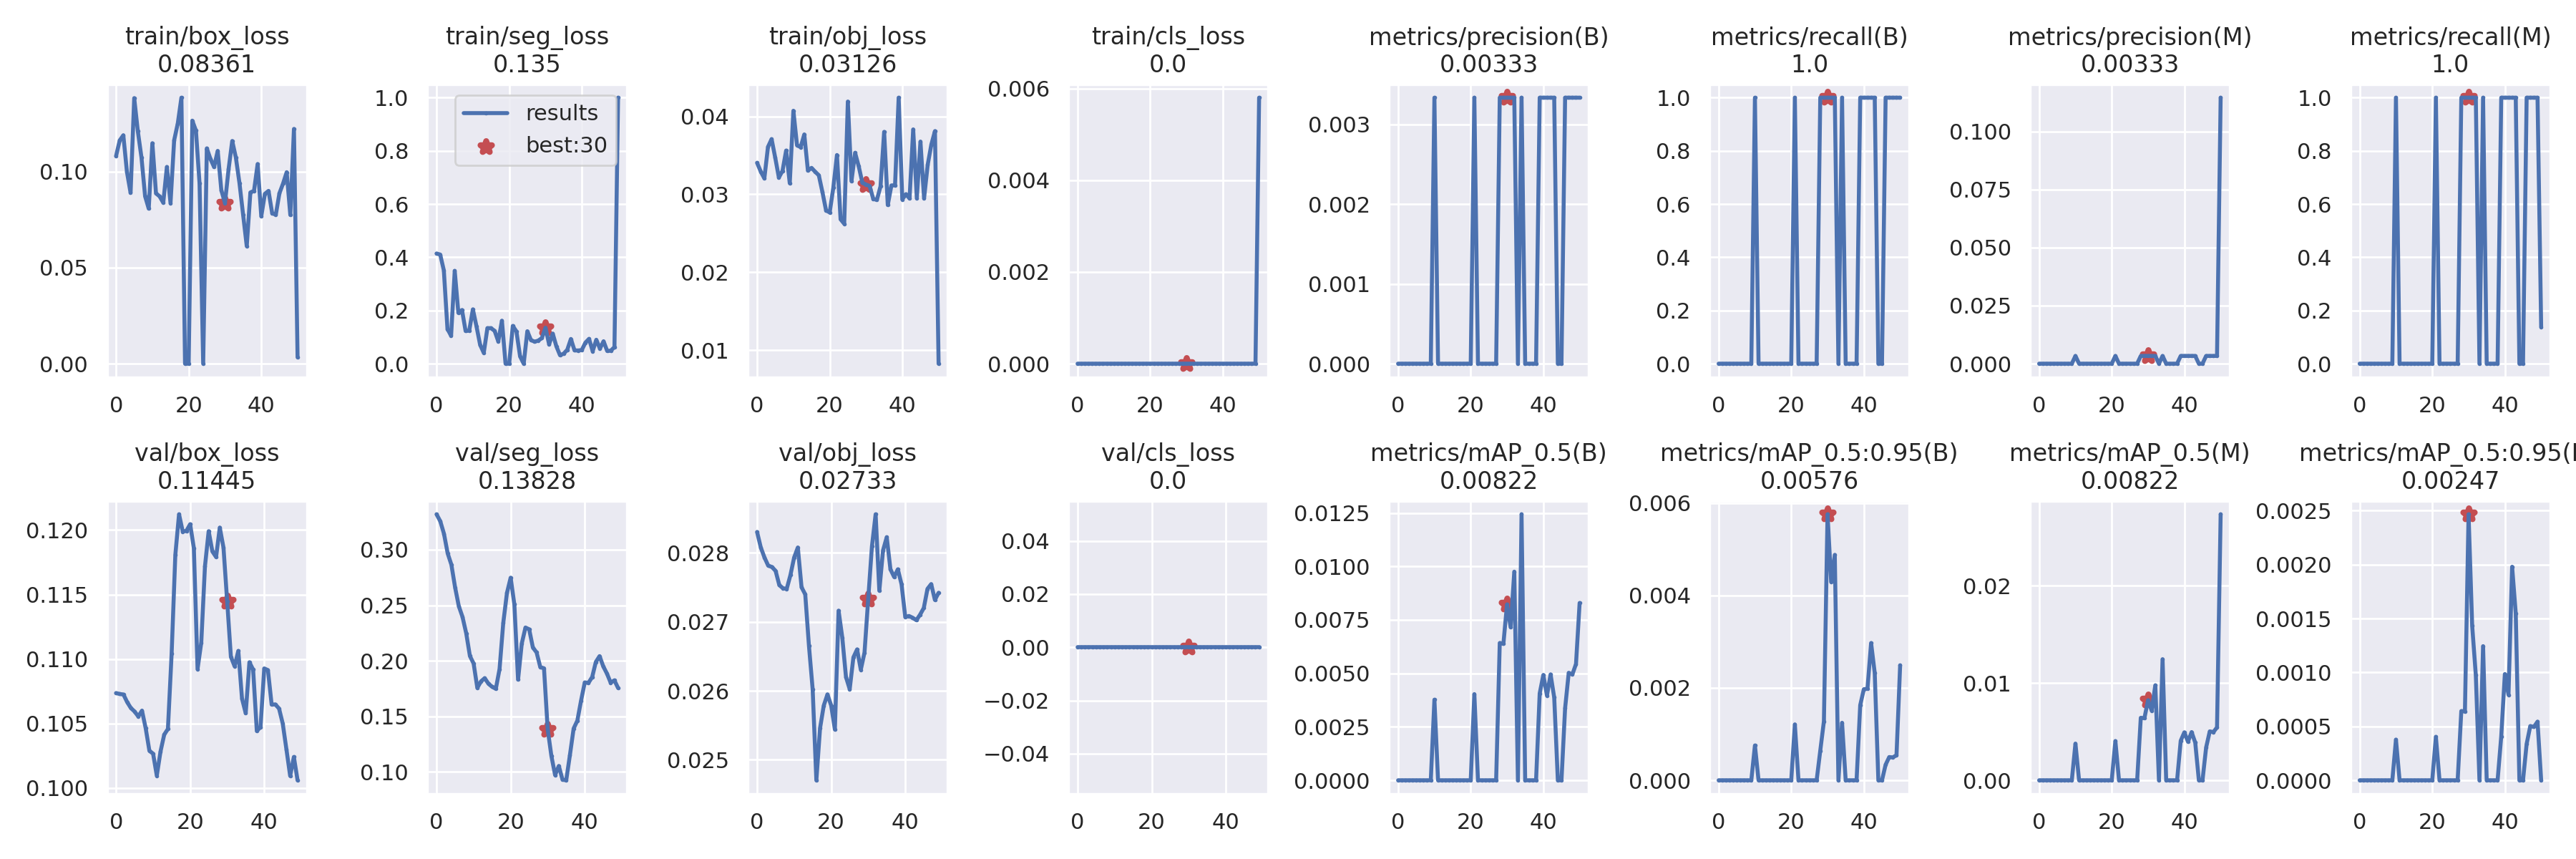

In [ ]:
display.Image(filename=f'/content/drive/MyDrive/footfall/yolov5/runs/train-seg/exp3/results.png', width=1200)

This line of code runs the validation process on the trained YOLOv5 model with instance segmentation.

- `--weights /content/drive/MyDrive/footfall/yolov5/runs/train-seg/exp3/weights/best.pt` specifies the path to the weights of the trained model.
- `--data /content/drive/MyDrive/footfall/AI-Task-footfallcam-2/data.yaml` is the path to the YAML configuration file containing information about the validation dataset.
- `--img 640` sets the size of the images for validation to be 640x640 pixels.
- `--name exp3` provides the name for this specific validation run.

The validation process computes metrics such as precision, recall, and mAP to evaluate the performance of the model on unseen data. These metrics are computed for both the bounding box predictions (Box) and the instance segmentation masks (Mask). 

The result printed includes the performance metrics and the computation speed. Unfortunately, in this case, no instances were detected, so all metrics are zero. It also mentions where the validation results are saved (`../runs/val-seg/exp3`).

In [ ]:
!python val.py --weights /content/drive/MyDrive/footfall/yolov5/runs/train-seg/exp3/weights/best.pt --data /content/drive/MyDrive/footfall/AI-Task-footfallcam-2/data.yaml --img 640  --name exp3

segment/val: data=/content/drive/MyDrive/footfall/AI-Task-footfallcam-2/data.yaml, weights=['/content/drive/MyDrive/footfall/yolov5/runs/train-seg/exp3/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=../runs/val-seg, name=exp3, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-168-gec2b853 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7398422 parameters, 0 gradients, 25.7 GFLOPs
val: Scanning /content/drive/MyDrive/footfall/AI-Task-footfallcam-2/valid/labels.cache... 1 images, 0 backgrounds, 0 corrupt: 100% 1/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  2.90it/s]
                   all          1    

This line of code initiates the prediction process, where the trained model is used to predict the instances of the "tag" class in a provided video.

- `--weights /content/drive/MyDrive/footfall/yolov5/runs/train-seg/exp3/weights/best.pt` is the path to the trained model weights.
- `--conf 0.25` sets the confidence threshold for prediction. Any detections with confidence lower than this are discarded.
- `--source /content/drive/MyDrive/footfall/sample.mp4` specifies the path to the video file on which to run predictions.
- `--name exp1805` sets the name for this run of the prediction.

The result details the prediction process on the video. It iterates over the video frame by frame (`video 1/1 (1/1341) /content/drive/MyDrive/footfall/sample.mp4: 480x640`), and for each frame, the model identifies the presence of any tags. It also provides the bounding box coordinates of the tag and its confidence score. If there are no detections in a frame, it is indicated by `(no detections)`.

For instance, in the second frame (`video 1/1 (2/1341)`), a 'work-tag' is detected, and the location and confidence are printed (`Tag detected at [tensor(0.), tensor(285.), tensor(37.), tensor(301.)] with confidence 0.32615265250205994`). 

The information on how long each frame took to process is also printed (e.g., `324.5ms`).

This process continues for all frames of the video, providing an insight into the locations and number of detected tags.

In [35]:
!python predict.py --weights /content/drive/MyDrive/footfall/yolov5/runs/train-seg/exp3/weights/best.pt --conf 0.25 --source /content/drive/MyDrive/footfall/sample.mp4 --name exp1805

segment/predict: weights=['/content/drive/MyDrive/footfall/yolov5/runs/train-seg/exp3/weights/best.pt'], source=/content/drive/MyDrive/footfall/sample.mp4, data=../data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../runs/predict-seg, name=exp1805, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
requirements: /usr/local/lib/python3.10/dist-packages/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-168-gec2b853 Python-3.10.11 torch-2.0.0+cu118 CPU

Fusing layers... 
Model summary: 165 layers, 7398422 parameters, 0 gradients
video 1/1 (1/1341) /content/drive/MyDrive/footfall/sample.mp4: 480x640 (no detections), 377.8ms
Tag detected at [tensor(0.), tensor(285.), tensor(37.), tensor(301.)] with confi